In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
iris = pd.read_csv("../Data/iris.csv.bz2", sep="\t")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris[["Sepal.Length","Sepal.Width","Petal.Length","Petal.Width"]].values
y = iris.Species.values
X.shape

(150, 4)

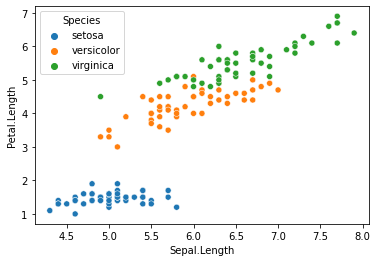

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
color = 0*(y == "setosa") + 1*(y == "versicolor")
sns.scatterplot(x = "Sepal.Length", y = "Petal.Length", hue="Species", data=iris) 
plt.show()

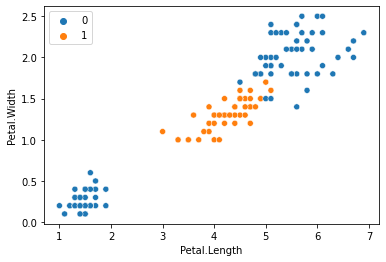

In [5]:
sns.scatterplot(x = "Petal.Length", y = "Petal.Width", hue=color, data=iris) 
plt.show()

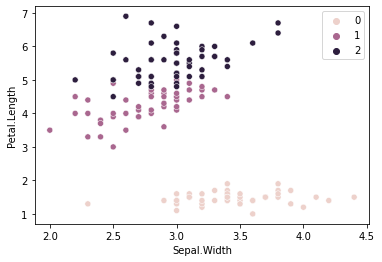

In [6]:
color2 = 1*(y == "versicolor") + 2*(y == "virginica")
sns.scatterplot(x = "Sepal.Width", y = "Petal.Length", hue=color2, data=iris) 
plt.show()

#### Euclidean

In [7]:
Euclidean_m = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean').fit(X, y)
cv = cross_val_score(Euclidean_m, X, y, cv=10) 
np.mean(cv)

0.96

#### Manhattan

In [8]:
manhattan_m = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan').fit(X, y)
cv = cross_val_score(manhattan_m, X, y, cv=10) 
np.mean(cv)

0.96

#### Chebyshev

In [9]:
chebyshev_m = KNeighborsClassifier(n_neighbors = 1, metric = 'chebyshev').fit(X, y)
cv = cross_val_score(chebyshev_m, X, y, cv=10) 
np.mean(cv)

0.9666666666666666

#### Mahalanobis

In [24]:
Sigma = np.cov(X, rowvar=False)
mahalanobis_m = KNeighborsClassifier(n_neighbors=1,
                         metric="mahalanobis",
                         metric_params={"V":Sigma}).fit(X, y)
cv = cross_val_score(mahalanobis_m, X, y, cv=10) 
np.mean(cv)

0.9

### 7

#### Euclidean

In [77]:
rows = []
for i in range(1, 16):
    Euclidean_m = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean').fit(X, y)
    cv = cross_val_score(Euclidean_m, X, y, cv=10)   
    euclidean_accuracy = np.mean(cv)
    print(i,euclidean_accuracy)

1 0.96
2 0.9533333333333334
3 0.9666666666666666
4 0.9666666666666666
5 0.9666666666666668
6 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
9 0.9733333333333334
10 0.9666666666666668
11 0.9666666666666668
12 0.9733333333333334
13 0.9800000000000001
14 0.9733333333333334
15 0.9733333333333334


#### Manhattan

In [76]:
for i in range(1, 16):
    manhattan_m = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan').fit(X, y)
    cv = cross_val_score(manhattan_m, X, y, cv=10) 
    manhattan_accuracy = np.mean(cv)
    print(i,manhattan_accuracy)

1 0.96
2 0.9400000000000001
3 0.96
4 0.9533333333333334
5 0.9666666666666668
6 0.9400000000000001
7 0.9533333333333334
8 0.9533333333333334
9 0.9733333333333334
10 0.96
11 0.9600000000000002
12 0.9666666666666668
13 0.9666666666666668
14 0.9666666666666668
15 0.9733333333333334


#### Chebyshev

In [37]:
for i in range(1, 15):
    chebyshev_m = KNeighborsClassifier(n_neighbors = i, metric = 'chebyshev').fit(X, y)
    cv = cross_val_score(chebyshev_m, X, y, cv=10) 
    chebyshev_accuracy = np.mean(cv)
    print(i,chebyshev_accuracy)

1 0.9666666666666666
2 0.96
3 0.9733333333333334
4 0.9733333333333334
5 0.96
6 0.9733333333333334
7 0.9800000000000001
8 0.9733333333333334
9 0.9800000000000001
10 0.9733333333333334
11 0.9733333333333334
12 0.9733333333333334
13 0.9666666666666666
14 0.9600000000000002


#### Mahalanobis

In [36]:
Sigma = np.cov(X, rowvar=False)
for i in range(1, 15):
    mahalanobis_m = KNeighborsClassifier(n_neighbors=i,
                             metric="mahalanobis",
                             metric_params={"V":Sigma}).fit(X, y)
    cv = cross_val_score(mahalanobis_m, X, y, cv=10) 
    mahalanobis_accuracy = np.mean(cv) 
    print(i,mahalanobis_accuracy)

1 0.9
2 0.9
3 0.9066666666666666
4 0.9
5 0.9
6 0.8733333333333334
7 0.8733333333333334
8 0.8733333333333334
9 0.8733333333333334
10 0.86
11 0.8733333333333334
12 0.8533333333333333
13 0.8666666666666668
14 0.8733333333333334


In [78]:
rows = []
for i in range(1, 16):
    Euclidean_m = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean').fit(X, y)
    cv = cross_val_score(Euclidean_m, X, y, cv=10)   
    euclidean_accuracy = np.mean(cv)
    
    manhattan_m = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan').fit(X, y)
    cv = cross_val_score(manhattan_m, X, y, cv=10) 
    manhattan_accuracy = np.mean(cv)
    
    chebyshev_m = KNeighborsClassifier(n_neighbors = i, metric = 'chebyshev').fit(X, y)
    cv = cross_val_score(chebyshev_m, X, y, cv=10) 
    chebyshev_accuracy = np.mean(cv)
    
    Sigma = np.cov(X, rowvar=False)
    mahalanobis_m = KNeighborsClassifier(n_neighbors=i,
                             metric="mahalanobis",
                             metric_params={"V":Sigma}).fit(X, y)
    cv = cross_val_score(mahalanobis_m, X, y, cv=10) 
    mahalanobis_accuracy = np.mean(cv) 
   
    rows.append([euclidean_accuracy, manhattan_accuracy,chebyshev_accuracy,mahalanobis_accuracy])
    
df = pd.DataFrame(rows, index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],columns=["Euclidean","Manhattan","Chebyshev","Mahalanobis"])
print(df) 

    Euclidean  Manhattan  Chebyshev  Mahalanobis
1    0.960000   0.960000   0.966667     0.900000
2    0.953333   0.940000   0.960000     0.900000
3    0.966667   0.960000   0.973333     0.906667
4    0.966667   0.953333   0.973333     0.900000
5    0.966667   0.966667   0.960000     0.900000
6    0.966667   0.940000   0.973333     0.873333
7    0.966667   0.953333   0.980000     0.873333
8    0.966667   0.953333   0.973333     0.873333
9    0.973333   0.973333   0.980000     0.873333
10   0.966667   0.960000   0.973333     0.860000
11   0.966667   0.960000   0.973333     0.873333
12   0.973333   0.966667   0.973333     0.853333
13   0.980000   0.966667   0.966667     0.866667
14   0.973333   0.966667   0.960000     0.873333
15   0.973333   0.973333   0.960000     0.880000


In [96]:
df.max(numeric_only=True).idxmax()

'Euclidean'

In [97]:
df.max(numeric_only=True).max()

0.9800000000000001

In [99]:
df.idxmax()

Euclidean      13
Manhattan       9
Chebyshev       7
Mahalanobis     3
dtype: int64

The Euclidean metric will give the best accuracy when the k=13.